In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
t_range = pd.date_range('2016-01-01', '2016-12-31')
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [3]:
s1 = Series(np.random.randn(len(t_range)), index=t_range)
s1

2016-01-01   -0.041482
2016-01-02   -0.069909
2016-01-03   -0.842079
2016-01-04    0.138903
2016-01-05   -0.756742
                ...   
2016-12-27    0.755669
2016-12-28    0.991965
2016-12-29   -0.954270
2016-12-30    0.292855
2016-12-31   -0.715429
Freq: D, Length: 366, dtype: float64

In [4]:
s1['2016-01'].mean()

-0.2696558111348704

In [5]:
s1_month = s1.resample('M').mean() 
s1_month.index

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [7]:
s1.resample('H').bfill()

2016-01-01 00:00:00   -0.041482
2016-01-01 01:00:00   -0.069909
2016-01-01 02:00:00   -0.069909
2016-01-01 03:00:00   -0.069909
2016-01-01 04:00:00   -0.069909
                         ...   
2016-12-30 20:00:00   -0.715429
2016-12-30 21:00:00   -0.715429
2016-12-30 22:00:00   -0.715429
2016-12-30 23:00:00   -0.715429
2016-12-31 00:00:00   -0.715429
Freq: H, Length: 8761, dtype: float64

In [8]:
t_range = pd.date_range('2016-01-01', '2016-12-31', freq='H')
t_range

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-30 15:00:00', '2016-12-30 16:00:00',
               '2016-12-30 17:00:00', '2016-12-30 18:00:00',
               '2016-12-30 19:00:00', '2016-12-30 20:00:00',
               '2016-12-30 21:00:00', '2016-12-30 22:00:00',
               '2016-12-30 23:00:00', '2016-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [9]:
stock_df = DataFrame(index=t_range)

stock_df['BABA'] = np.random.randint(80, 160, size=len(t_range))
stock_df['TENCENT'] = np.random.randint(30, 50, size=len(t_range))

stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,128,45
2016-01-01 01:00:00,154,35
2016-01-01 02:00:00,142,45
2016-01-01 03:00:00,138,35
2016-01-01 04:00:00,152,35


<AxesSubplot:>

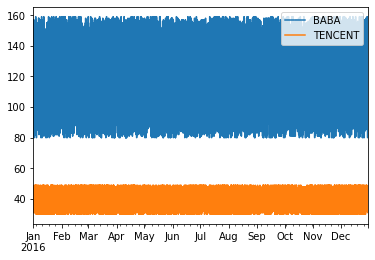

In [11]:
stock_df.plot()

In [12]:
weekly_df = DataFrame()

weekly_df['BABA'] = stock_df['BABA'].resample('W').mean()
weekly_df['TENCENT'] = stock_df['TENCENT'].resample('W').mean()

weekly_df.head()

,BABA,TENCENT
2016-01-03,119.638889,39.833333
2016-01-10,121.178571,39.821429
2016-01-17,120.952381,39.654762
2016-01-24,119.208333,38.946429
2016-01-31,120.755952,38.732143
